## RESTAURANT RATING PREDICTION

## Problem statement
 check the rating and if rating is good then we will increase it otherwise we will improve it.The main goal of this project is to perform extensive Exploratory Data Analysis(EDA) on the Zomato Dataset and build an appropriate Machine Learning Model that will help various Zomato Restaurants to predict their respective Ratings based on certain features.

## Approach: 
The classical machine learning tasks like Data Exploration, Data Cleaning,Feature Engineering, Model Building and Model Testing. Try out different machine learning algorithms that’s best fit for the above case.

## Results: 
You have to build a solution that should able to predict the ratings of the restaurants listed in the dataset

## Lets import all neccesary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Loading of the data 

In [2]:
data = pd.read_csv('zomato.csv')

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Show number of rows and features

In [4]:
data.shape

(51717, 17)

Columns inside list

In [5]:
data.columns.to_list()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

## Column Description
#### 1) url: contains the url of the restaurant in the zomato website
#### 2) address: contains the address of the restaurant in Bengaluru
#### 3) name: contains the name of the restaurant
#### 4) online_order: whether online ordering is available in the restaurant or not
#### 5) book_table: table book option available or not
#### 6) rate: contains the overall rating of the restaurant out of 5
#### 7) votes: contains total number of rating for the restaurant as of the above mentioned date
#### 8) phone: contains the phone number of the restaurant
#### 9) location: contains the neighborhood in which the restaurant is located
#### 10) rest_type: restaurant type
#### 11) dish_liked: dishes people liked in the restaurant
#### 12) cuisines: food styles, separated by comma
#### 13) approx_cost(for two people): contains the approximate cost for meal for two people
#### 14) reviews_list: list of tuples containing reviews for the restaurant, each tuple
#### 15) menu_item: contains list of menus available in the restaurant
#### 16) listed_in(type): type of meal
#### 17) listed_in(city): contains the neighborhood in which the restaurant is listed

## DATA CLEANING

Here we will clean our data for wrong dtypes, we will handle null values,remove irrelevant  columns, outliers etc.

## Let's rename the complex named columns for easy understanding

In [6]:
data.rename(columns={'approx_cost(for two people)':'approx_cost', 'listed_in(city)' : 'area'},inplace=True)

## Let's drop the irrelevant columns

In [7]:
data.drop(['url','address','menu_item','reviews_list','dish_liked','phone','listed_in(type)'], axis = 1, inplace=True)

In [8]:
df = data

In [9]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Banashankari


## Let's check for datatypes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
 9   area          51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


## Let's check  for "rate" columns

In [11]:
#unique values
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

## Let's replace all the null and garbage values with empty numbers

In [12]:
df['rate'] = df['rate'].str.replace("/5","")
df['rate'] = df['rate'].str.replace("nan","NaN")
df['rate'] = df['rate'].str.replace("NEW","NaN")
df['rate'] = df['rate'].str.replace("-","NaN")
df['rate'] = df['rate'].str.replace(" /5","")
df['rate'] = df['rate'].fillna(np.nan)
df['rate'] = df['rate'].str.replace(" ","")

In [13]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

## Let's check for  "approx _cost" column

In [14]:
#unique values
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [15]:
df['approx_cost'] = df['approx_cost'].str.replace("nan","NaN")
df['approx_cost'] = df['approx_cost'].fillna('NaN')
df['approx_cost'] = df['approx_cost'].str.replace(",","")

In [16]:
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'NaN', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

## Now let's change the data type Object to Float

In [17]:
df['approx_cost'] = df['approx_cost'].astype(float)
df['rate'] = df['rate'].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   approx_cost   51371 non-null  float64
 9   area          51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


## Let's check the Data description

The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. std - The standard deviation.we do statistical analysis on the basis of 5 points summary.

In [19]:
df.describe()

,rate,votes,approx_cost
count,41665.000000,51717.000000,51371.000000
mean,3.700449,283.697527,555.431566
std,0.440513,803.838853,438.850728
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


## Let's check for NULL values

In [20]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       346
area                0
dtype: int64

Let's check for the percentage of null values

In [21]:
(df.isnull().sum()/df.shape[0])*100

name             0.000000
online_order     0.000000
book_table       0.000000
rate            19.436549
votes            0.000000
location         0.040606
rest_type        0.438927
cuisines         0.087012
approx_cost      0.669026
area             0.000000
dtype: float64

## From the above execution we found columns "location","rest_type","cuisines","approx_cost" have less number of null values as compared to "rate" column. Let's drop the null values from them

In [22]:
df = df[df["location"].notna()]
df = df[df["rest_type"].notna()]
df = df[df["cuisines"].notna()]
df = df[df["approx_cost"].notna()]

In [23]:
df.isna().sum()

name               0
online_order       0
book_table         0
rate            9885
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
area               0
dtype: int64

## Let's Handle the null values in the "rate" column

In [24]:
df["rate"].describe()

count    41263.000000
mean         3.702011
std          0.439985
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

## Let's check for outliers by statistical method

In [25]:
q1 =  df['rate'].quantile(0.25)
q3 =  df['rate'].quantile(0.75)

xyz = q3-q1

lower_range = q1 - (1.5 * xyz)
upper_range = q3 + (1.5 * xyz)

outliers = len(df[(df['rate'] < lower_range) | (df['rate'] > upper_range)])
print("Number of Rows having Outliers : ",outliers)

Number of Rows having Outliers :  183


From the above execution we found that we have 183 outliers in the "rate" column but we all know rating is always in the range from 1 to 5, so we will impute with median

In [26]:
df['rate'] = df['rate'].fillna(df['rate'].median())

df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
area            0
dtype: int64

## Let's check the numerical columns

In [27]:
Numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("There are {} numerical features and their names are {}".format(len(Numerical_features),Numerical_features))

There are 3 numerical features and their names are ['rate', 'votes', 'approx_cost']


## Let's check for distribution of the numerical features

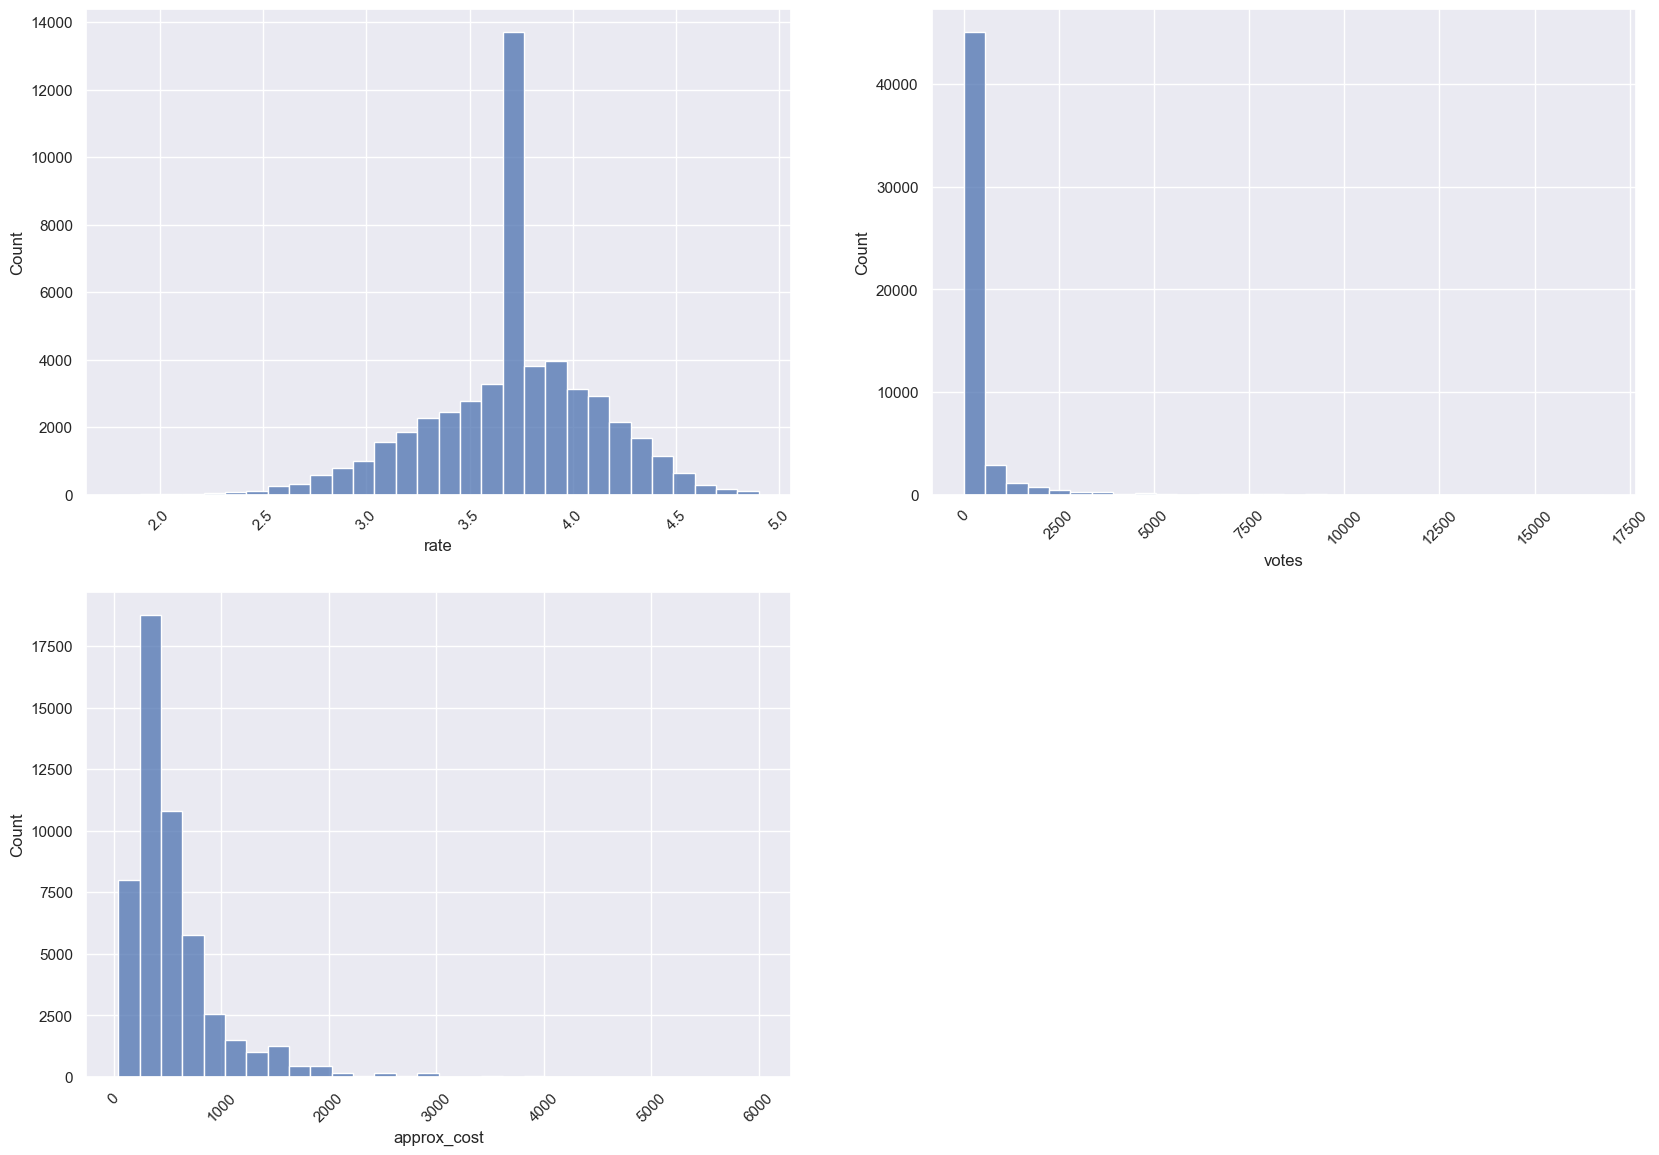

In [28]:
plt.figure(figsize = (20,150))
for i in enumerate(Numerical_features):
    plt.subplot(20,2,i[0]+1)
    sns.set(rc={'figure.figsize':(5,5)})
    sns.histplot(data=df,x = i[1], bins = 30)
    plt.xticks(rotation = 45)

## Reset the index

In [29]:
df.reset_index(inplace=True)
df.drop(['index'],axis = 1,inplace = True)

## Data Visualization

## Let's check for the Most famous restaurant chains in Benglaluru

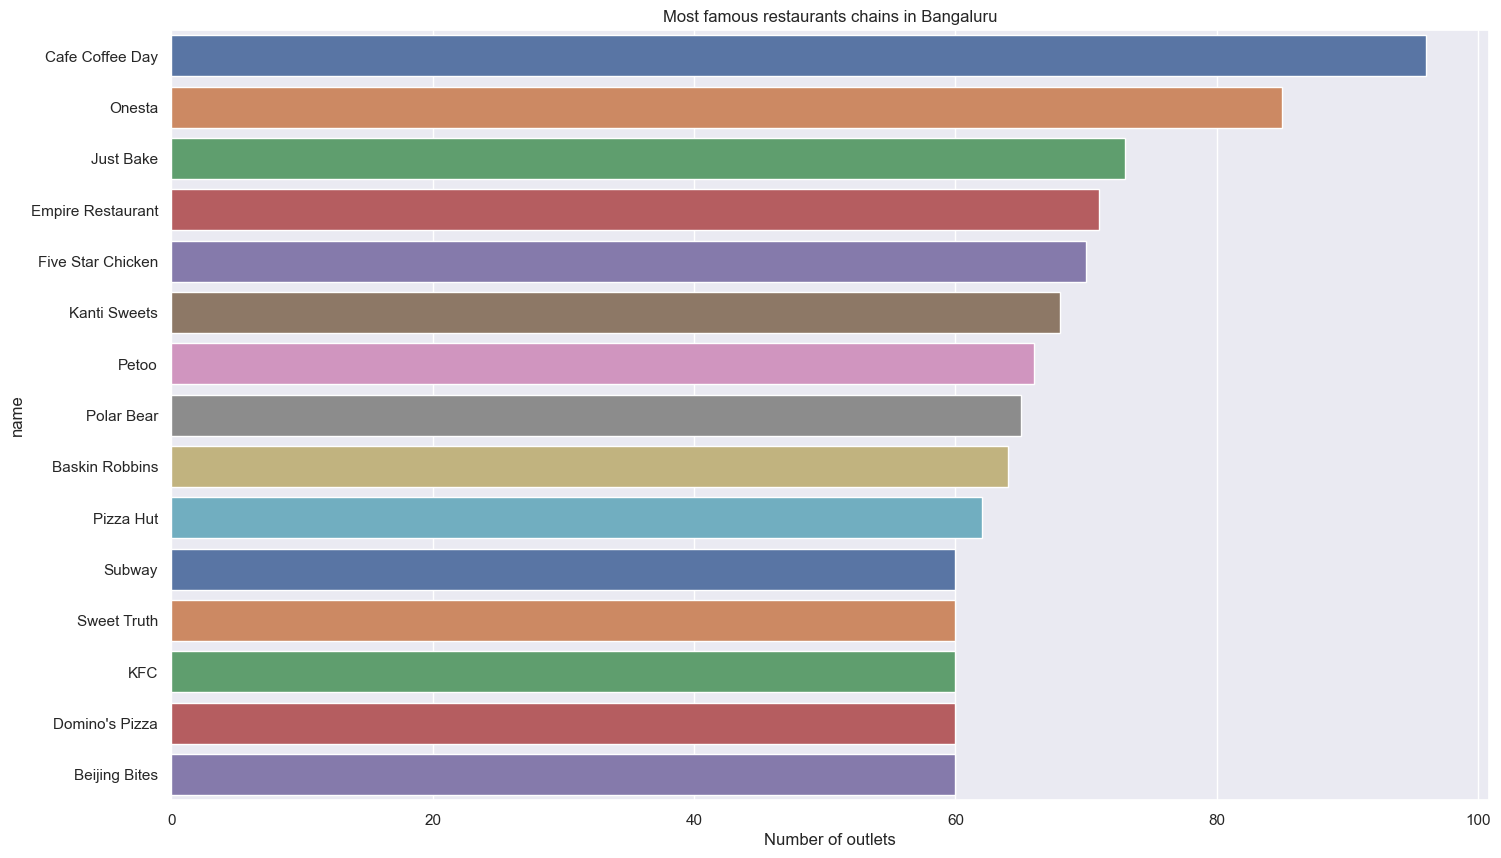

In [30]:
plt.figure(figsize = (17,10))
chains = df['name'].value_counts()[:15]
sns.barplot(x = chains,y = chains.index, palette="deep")
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

## Let's check for the restaurants who have got highest orders

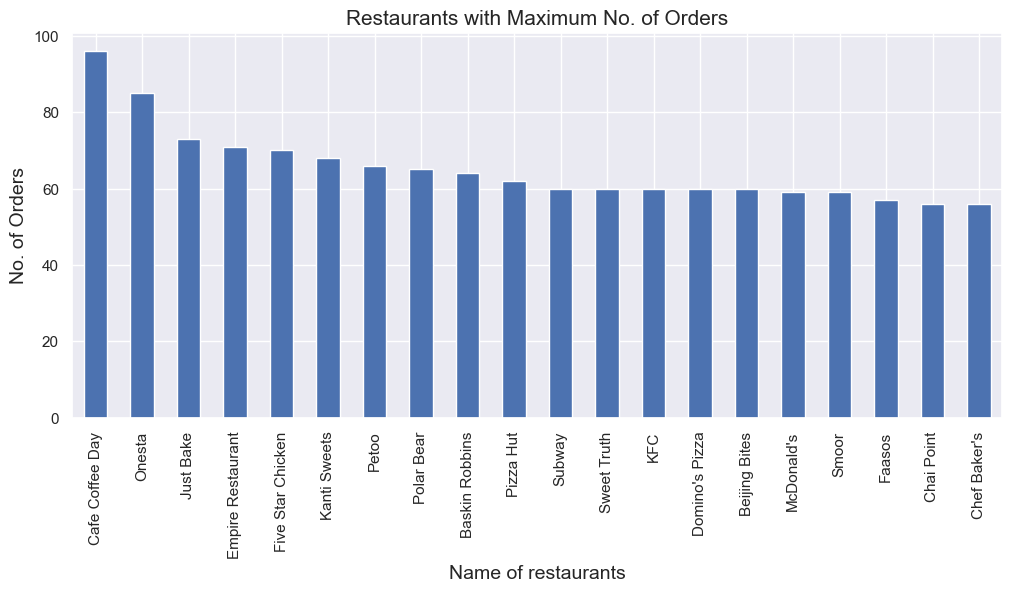

In [31]:
plt.figure(figsize = (12,5))
data = df['name'].value_counts()[:20]
data.plot(kind = 'bar')
plt.xlabel('Name of restaurants',size = 14)
plt.ylabel('No. of Orders',size = 14)
plt.title("Restaurants with Maximum No. of Orders",fontsize = 15)
plt.show()

## Let's check how many restaurants have online ordering facilities

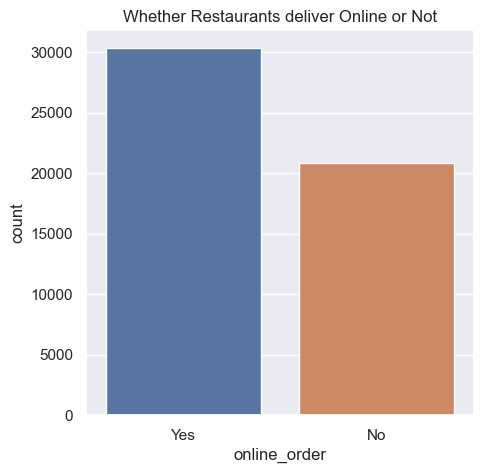

In [32]:
sns.countplot(data=df,x=df['online_order'])
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title("Whether Restaurants deliver Online or Not")
plt.show()

Above execution show more than 30000 restaurants has the facility of online delivery

## Let's check how many restaurants offer Pre Booking of Table

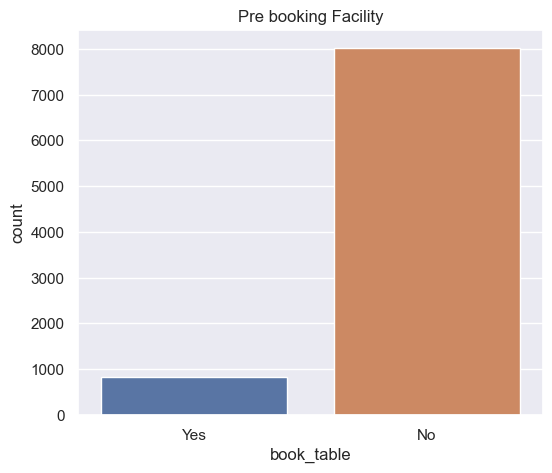

In [33]:
data = df[['name','book_table']].drop_duplicates()

plt.figure(figsize = (6,5))
fx = sns.countplot(x="book_table",data=data).set_title("Pre booking Facility",fontsize = 12)
plt.show()

Above execution show less than 1000 restaurants have prebooking table facility

## Let's check the location that have highest order

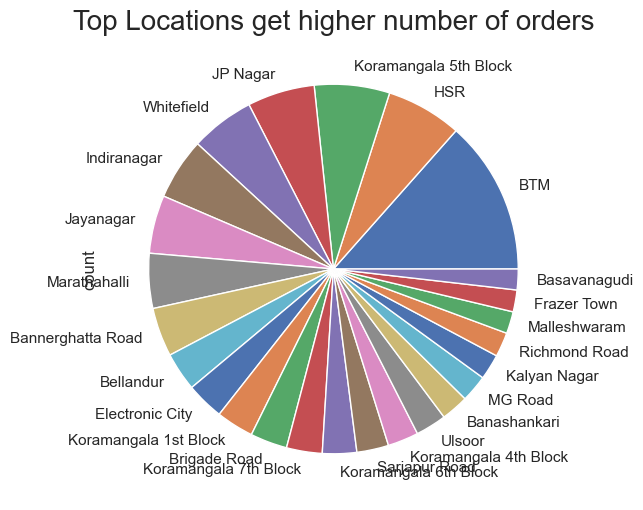

In [34]:
plt.figure(figsize=(12,6))
data = df.location.value_counts()[:25]
data.plot(kind='pie')
plt.title("Top Locations get higher number of orders",size =20)
plt.show()

## Let's check for the most common ratings for the orders

<Axes: xlabel='rate', ylabel='Density'>

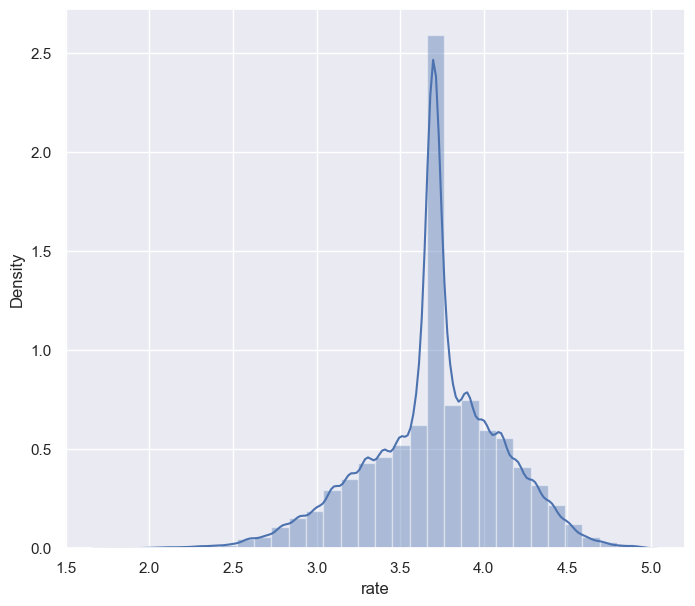

In [35]:
plt.figure(figsize=(8,7))

sns.distplot(df['rate'],bins = 30)

Above execution shows us the that maximum number of orders got 3.7 rating for their restaurants

## Let's check for the common Approximate Costs for meal of two people

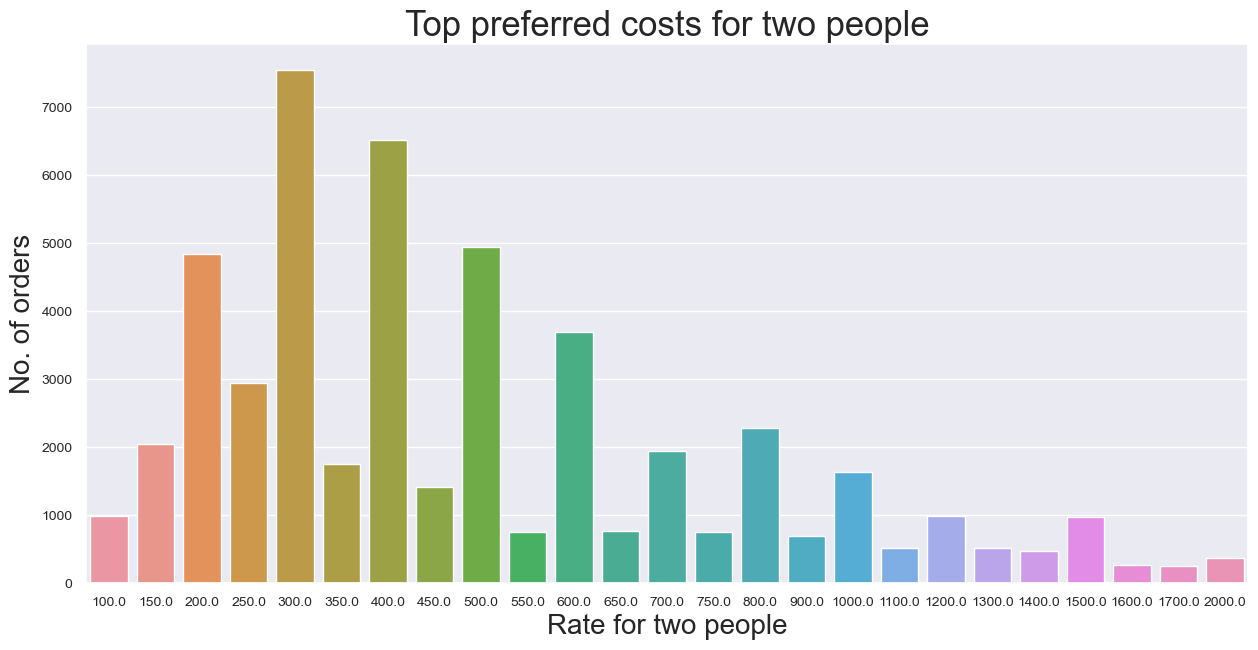

In [36]:
data=pd.DataFrame(df['approx_cost'].value_counts().reset_index()[:25])
data.columns=['approx_cost','count']
data=data.set_index('approx_cost')
plt.figure(figsize=(15,7))
sns.barplot(x=data.index,y=data['count'])
plt.xlabel('Rate for two people',size=20)
plt.ylabel('No. of orders',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Top preferred costs for two people',size=25)
plt.show()

## Let's check top 10 types of the orders restaurants offer

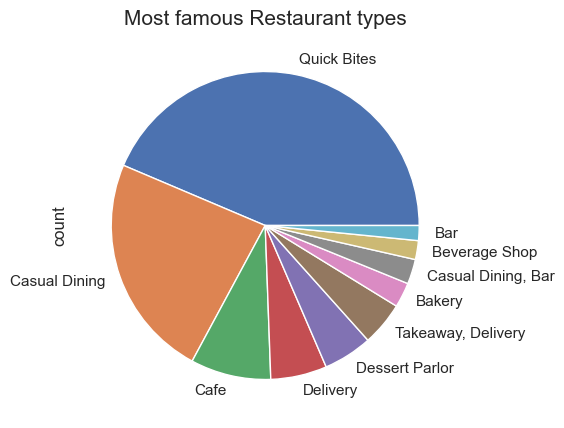

In [37]:
plt.figure(figsize = (12,5))
abc = df.rest_type.value_counts()[:10]
abc.plot(kind = 'pie')
plt.title("Most famous Restaurant types",fontsize = 15)
plt.show()

## Let's check for Most famous Cusines among people

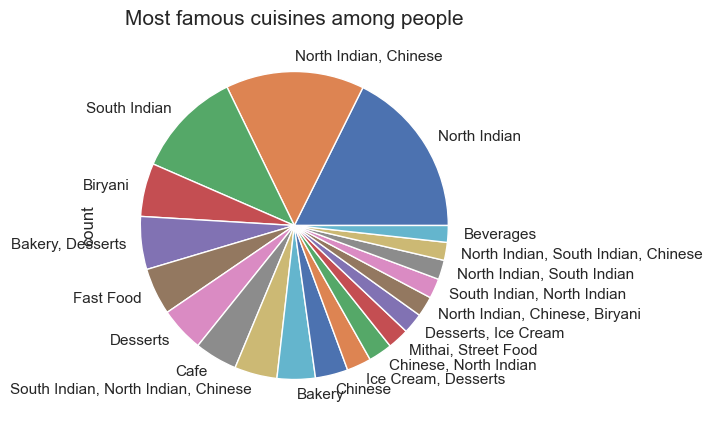

In [38]:
plt.figure(figsize = (12,5))
xyz = df.cuisines.value_counts()[:20].plot(kind = 'pie')
plt.title("Most famous cuisines among people",fontsize = 15)
plt.show()

## Let's check for the tTop Locations with most Number of Restaurants

<function matplotlib.pyplot.show(close=None, block=None)>

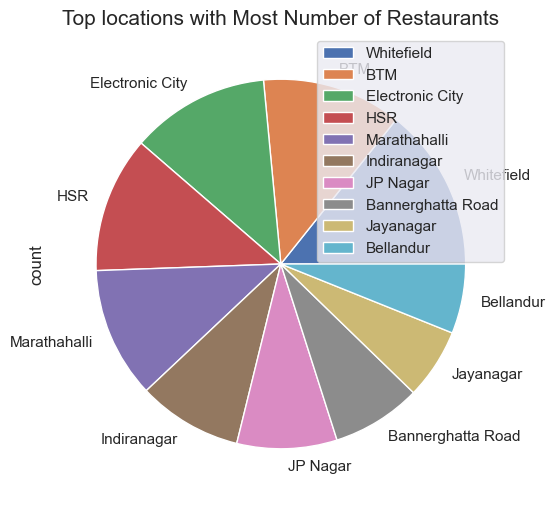

In [39]:
loc = pd.DataFrame(df.groupby(by = 'location')['name'].nunique())
loc.columns = ['count']
loc.sort_values(by = 'count',ascending = False,inplace=True)
plt.rcParams['figure.figsize'] = (8,6)
ax = loc[0:10].plot(kind='pie',subplots=True)
plt.title('Top locations with Most Number of Restaurants',size = 15)
plt.show

## Let's find the Relationship between the features

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'rate'), Text(0, 1.5, 'votes'), Text(0, 2.5, 'approx_cost')])

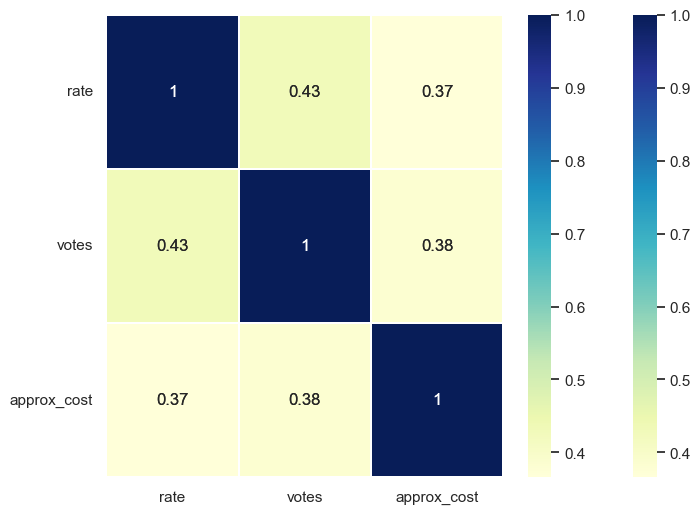

In [40]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), linewidths=.1, cmap='YlGnBu', annot=True)
plt.yticks(rotation=0)
sns.heatmap(df.select_dtypes(include=['number']).corr(), linewidths=.1, cmap='YlGnBu', annot=True)
plt.yticks(rotation=0)

## Let's build our model

In [41]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


## Let's convert the categorical variables into numeric format

## For the column "online_order"

In [42]:
df.online_order[df.online_order == 'Yes'] = 1
df.online_order[df.online_order == 'No'] = 0

In [43]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


## For the column "book_table"

In [44]:
df.book_table[df.book_table == 'Yes'] = 1
df.book_table[df.book_table == 'No'] = 0

In [45]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


## For the Rest Type column (Feature scaling)

In [46]:
# One hot encoding
rest_df = pd.DataFrame(df['rest_type'])
rts = list(rest_df.rest_type.str.split(","))
unique_rts = list(set([rt for sub_list in rts for rt in sub_list]))

for rt in unique_rts:
    rest_df[rt] = int(0)
    
rest_df.head()

,rest_type,Microbrewery,Club,Food Court,Food Court,Cafe,Confectionery,Irani Cafee,Bar,Dessert Parlor,...,Mess,Lounge,Quick Bites,Delivery,Delivery,Beverage Shop,Pub,Cafe,Sweet Shop,Kiosk
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
count = 0
for i in rts:
    rest_df.loc[count,i] = int(1)
    count+=1

In [48]:
rest_df.head()

,rest_type,Microbrewery,Club,Food Court,Food Court,Cafe,Confectionery,Irani Cafee,Bar,Dessert Parlor,...,Mess,Lounge,Quick Bites,Delivery,Delivery,Beverage Shop,Pub,Cafe,Sweet Shop,Kiosk
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
rest_df.drop(['rest_type'],axis =1 ,inplace =True)
rest_df.head()

,Microbrewery,Club,Food Court,Food Court,Cafe,Confectionery,Irani Cafee,Bar,Dessert Parlor,Quick Bites,...,Mess,Lounge,Quick Bites,Delivery,Delivery,Beverage Shop,Pub,Cafe,Sweet Shop,Kiosk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## For "cuisines column"

In [50]:
cuisines_df = pd.DataFrame(df['cuisines'])
cuisines = list(cuisines_df.cuisines.str.split(", "))
unique_cuisines = list(set([cs for sub_list in cuisines for cs in sub_list]))
unique_cuisines.remove("Cafe")
unique_cuisines.remove("Bakery")

for cn in unique_cuisines:
    cuisines_df[cn] = 0   
    
cuisines_df.head()

,cuisines,Drinks Only,Salad,Street Food,Parsi,Australian,Sushi,Bubble Tea,Goan,Oriya,...,Assamese,American,Finger Food,Spanish,German,Lucknowi,Thai,North Eastern,Mangalorean,Asian
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
correct_cn = []
for i in cuisines:
    if "Cafe" in i:
        i.remove("Cafe") 
    if "Bakery" in i:
        i.remove("Bakery")
    correct_cn.append(list(set(i)))
    
    count = 0
for i in correct_cn:
    cuisines_df.loc[count, i] = int(1)
    count+=1
    
    
cuisines_df.head()

,cuisines,Drinks Only,Salad,Street Food,Parsi,Australian,Sushi,Bubble Tea,Goan,Oriya,...,Assamese,American,Finger Food,Spanish,German,Lucknowi,Thai,North Eastern,Mangalorean,Asian
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
cuisines_df.drop(['cuisines'], axis = 1, inplace=True)
cuisines_df.head()

,Drinks Only,Salad,Street Food,Parsi,Australian,Sushi,Bubble Tea,Goan,Oriya,Pizza,...,Assamese,American,Finger Food,Spanish,German,Lucknowi,Thai,North Eastern,Mangalorean,Asian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## For the "Location" column

In [53]:
location_df = df['location']
location_df = pd.get_dummies(location_df)
location_df.head()

,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
data_with_location = pd.concat([df, rest_df, cuisines_df, location_df], axis=1)
data_with_location.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False


## For the "Area" column

In [55]:
area_df = df['area']
area_df = pd.get_dummies(area_df)
area_df.head()

,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
data_with_area = pd.concat([df, rest_df, cuisines_df, area_df], axis = 1)
data_with_area.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False


## Let's do the Feature Selection

In [57]:
data_with_location.drop(columns = ['name', 'location', 'rest_type', 'cuisines', 'area'], axis = 1, inplace=True)
data_with_area.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis=1, inplace=True)
print(data_with_location.columns[200:])

Index(['Langford Town', 'Lavelle Road', 'MG Road', 'Magadi Road', 'Majestic',
       'Malleshwaram', 'Marathahalli', 'Mysore Road', 'Nagarbhavi', 'Nagawara',
       'New BEL Road', 'North Bangalore', 'Old Airport Road',
       'Old Madras Road', 'Peenya', 'RT Nagar', 'Race Course Road',
       'Rajajinagar', 'Rajarajeshwari Nagar', 'Rammurthy Nagar',
       'Residency Road', 'Richmond Road', 'Sadashiv Nagar', 'Sahakara Nagar',
       'Sanjay Nagar', 'Sankey Road', 'Sarjapur Road', 'Seshadripuram',
       'Shanti Nagar', 'Shivajinagar', 'South Bangalore', 'St. Marks Road',
       'Thippasandra', 'Ulsoor', 'Uttarahalli',
       'Varthur Main Road, Whitefield', 'Vasanth Nagar', 'Vijay Nagar',
       'West Bangalore', 'Whitefield', 'Wilson Garden', 'Yelahanka',
       'Yeshwantpur'],
      dtype='object')


In [58]:
x1 = data_with_location.drop("rate", axis = 1).values
y1 = data_with_location["rate"].values

print("X = ", x1)
print("Y = ", y1)

X =  [[1 1 775 ... False False False]
 [1 0 787 ... False False False]
 [1 0 918 ... False False False]
 ...
 [0 0 0 ... False False False]
 [0 1 236 ... False False False]
 [0 0 13 ... False False False]]
Y =  [4.1 4.1 3.8 ... 3.7 4.3 3.4]


In [59]:
x2 = data_with_area.drop("rate", axis = 1).values
y2 = data_with_area["rate"].values

print("X = ", x2)
print()
print("Y = ", y2)

X =  [[1 1 775 ... False False False]
 [1 0 787 ... False False False]
 [1 0 918 ... False False False]
 ...
 [0 0 0 ... False False True]
 [0 1 236 ... False False True]
 [0 0 13 ... False False True]]

Y =  [4.1 4.1 3.8 ... 3.7 4.3 3.4]


## ExtraTree regressor

In [60]:
from sklearn.ensemble import ExtraTreesRegressor

In [61]:
imp_features1 = ExtraTreesRegressor()
imp_features1.fit(x1, y1)
print(imp_features1.feature_importances_)

[ 1.74293214e-02  1.67700806e-01  2.87409483e-01  4.81544254e-02
  2.79730973e-04  1.08794566e-04  3.34973228e-03  8.35099354e-04
  2.55395006e-03  1.49517763e-05  1.24870262e-06  2.12677775e-03
  1.03249578e-03  3.71738154e-03  1.47157107e-03  1.96646073e-06
  3.37903724e-03  1.64815609e-03  4.62707461e-04  1.96001864e-04
  2.26994438e-03  1.93277672e-18  2.50548645e-04  3.90845107e-04
  9.51691540e-05  7.50752068e-07  2.73046715e-04  3.81154769e-04
  3.59815909e-03  9.43123701e-03  1.48088270e-03  1.66871984e-03
  3.28719222e-04  5.19465616e-06  9.61352816e-04  4.45258330e-05
  8.93479238e-03  2.30105031e-03  4.56582910e-03  9.91335661e-04
  2.15334963e-04  1.03808055e-02  4.51290083e-04  1.40276148e-04
  5.55406399e-07  2.46578004e-03  5.97863323e-03  8.22491036e-06
  7.05661484e-06  8.77350440e-05  6.94190030e-06  1.92340937e-04
  8.02198405e-04  5.82970464e-03  2.92467853e-04  6.52574892e-04
  6.01371478e-03  1.65898504e-02  7.76394685e-06  1.17966520e-04
  5.65016483e-06  1.42877

<Axes: >

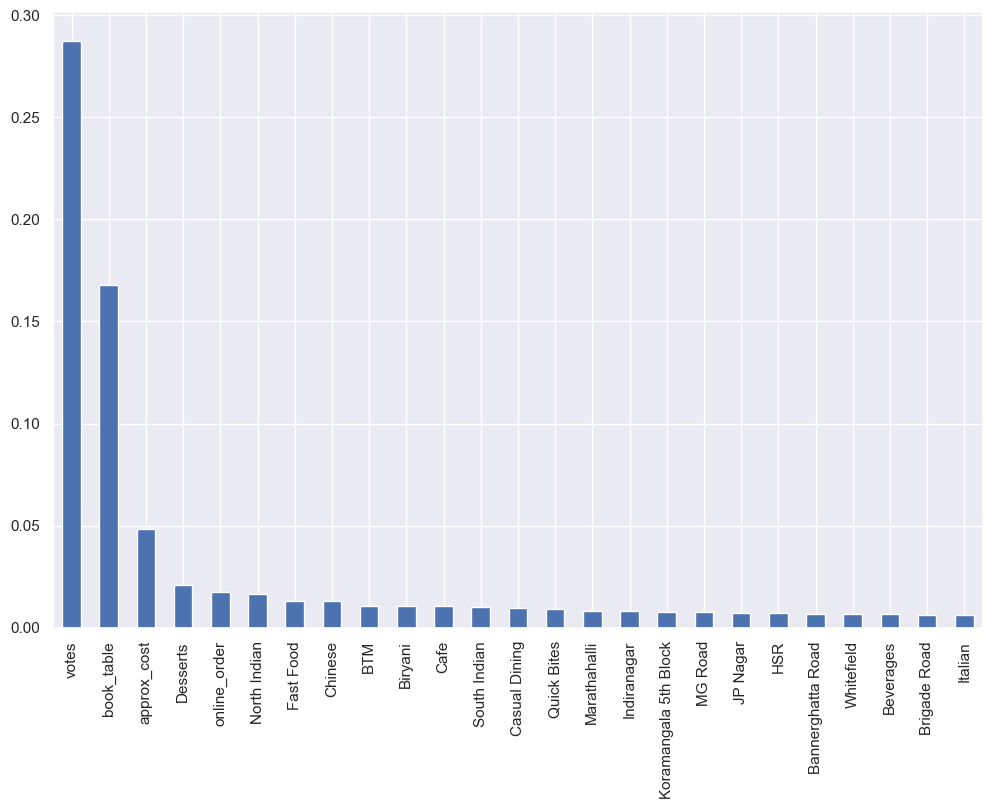

In [62]:
plt.figure(figsize = (12, 8))
columns = data_with_location.drop("rate", axis = 1).columns
fseries = pd.Series(imp_features1.feature_importances_, index = columns)
fseries.nlargest(25).plot(kind = "bar")

In [63]:
imp_features2 = ExtraTreesRegressor()
imp_features2.fit(x2, y2)
print(imp_features2.feature_importances_)

[2.16596873e-02 1.65609034e-01 3.22370544e-01 7.12080242e-02
 4.70330356e-04 1.27899840e-04 3.72196177e-03 8.42938041e-04
 2.75463755e-03 2.96143040e-05 1.65890916e-06 2.71965197e-03
 1.21988241e-03 3.94638662e-03 1.91892122e-03 1.48358628e-05
 4.15328685e-03 1.86403285e-03 6.93436329e-04 1.95854871e-04
 2.75350598e-03 2.60468820e-16 3.73001792e-04 6.10541738e-04
 2.22339087e-04 1.15770303e-06 3.46123045e-04 5.97459201e-04
 3.38838395e-03 1.01484833e-02 1.94421626e-03 2.53841010e-03
 4.18649264e-04 8.79443726e-06 1.31477124e-03 7.09603091e-05
 1.05833527e-02 2.56707235e-03 5.33406176e-03 1.14569162e-03
 2.40603415e-04 1.15231938e-02 4.97922876e-04 1.62276355e-04
 1.83145807e-07 2.83209535e-03 8.15276615e-03 3.81704909e-05
 2.19630159e-05 1.98709007e-04 2.21555932e-05 2.64211864e-04
 1.01091549e-03 7.46468032e-03 3.53972961e-04 7.48013171e-04
 8.92908985e-03 1.73647114e-02 1.09603743e-05 1.37738230e-04
 9.38594757e-06 2.07784958e-05 2.64717125e-03 4.10218983e-04
 2.19390435e-03 3.078220

<Axes: >

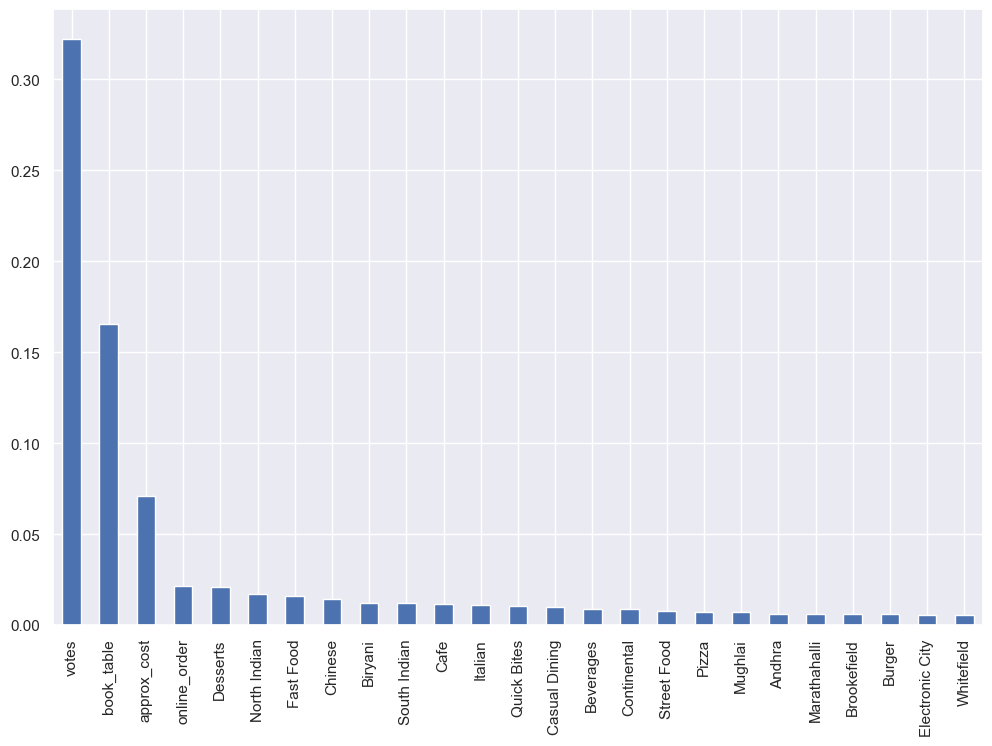

In [64]:
plt.figure(figsize = (12,8))
columns = data_with_area.drop("rate", axis = 1).columns
fseries = pd.Series(imp_features2.feature_importances_, index = columns)
fseries.nlargest(25).plot(kind = "bar")

## Train Test Splitting of Data

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [67]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, y2, test_size=0.2, random_state=45)

## Let's import ML Models

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## Linear Regression

For data_with_location

In [69]:
lr1 = LinearRegression()
lr1.fit(X1_train, Y1_train)

LinearRegression()

In [70]:
Y_lr1= lr1.predict(X1_test)
Y_lr1[:200]

array([3.62991683, 3.79964069, 3.58332728, 3.47683119, 3.4975586 ,
       3.88027089, 3.57544707, 3.49353679, 3.86347252, 3.53320488,
       3.56982321, 3.6604426 , 3.53176505, 3.61068282, 4.19715168,
       3.37859727, 3.80503796, 4.3273113 , 3.50741122, 3.43593872,
       3.44836378, 3.47423122, 3.84080644, 3.64507438, 3.50236147,
       3.53949009, 3.87090726, 3.79024524, 3.64700215, 3.50386862,
       3.63732186, 3.68638938, 3.91337852, 3.75297649, 3.50084539,
       3.45959943, 4.49553044, 3.57913175, 3.44801871, 3.79245249,
       3.60516597, 3.8037142 , 3.56304809, 3.76425961, 3.49637499,
       3.59808661, 3.61936542, 3.50015912, 4.4130877 , 4.1720865 ,
       3.4991    , 4.41497122, 3.63581494, 3.4473972 , 3.61054628,
       3.72462846, 3.54400763, 3.54362223, 3.61451582, 3.52741018,
       3.77207082, 3.81325351, 3.48137926, 3.65972531, 4.04477143,
       4.33671197, 3.48476316, 3.61871683, 3.76544352, 3.50519191,
       3.68741234, 3.48876104, 3.6006786 , 3.54197848, 3.42645

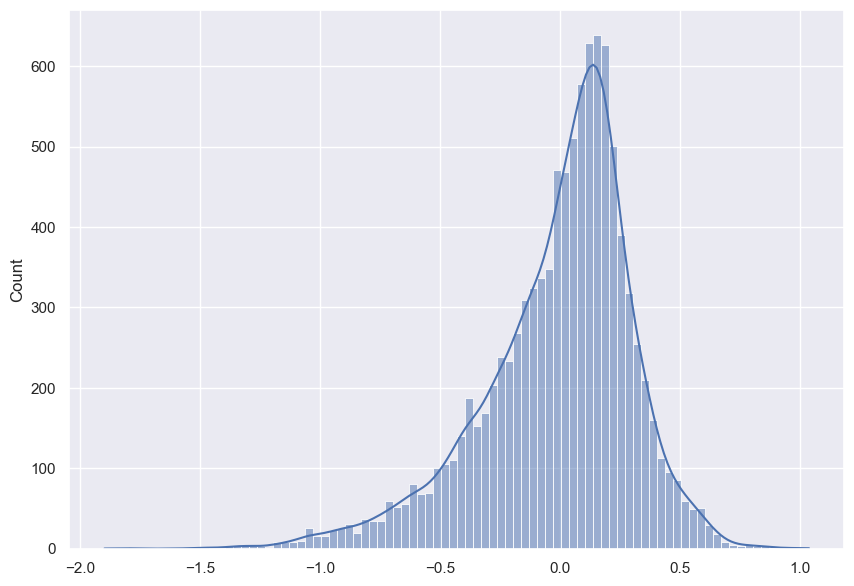

In [71]:
plt.figure(figsize=(10,7))
sns.histplot(Y1_test - Y_lr1, kde=True)
plt.show()

## For the Data with area

In [72]:
lr2 = LinearRegression()
lr2.fit(X2_train, Y2_train)

LinearRegression()

In [73]:
Y_lr2 = lr2.predict(X2_test)
Y_lr2[:200]

array([3.5029419 , 3.5511378 , 3.91561753, 3.52368338, 3.66518847,
       3.51235529, 4.08945341, 3.80960962, 3.67599618, 3.50507665,
       3.60841763, 3.71476562, 3.67750835, 4.07895661, 3.64647722,
       3.65973771, 4.0474277 , 3.58606034, 4.16103823, 3.59187532,
       3.64391994, 3.83578937, 3.50450118, 3.69563074, 3.70469412,
       3.97221676, 4.13041275, 3.47101527, 3.47678801, 3.63648144,
       3.71080768, 3.69714189, 3.76335347, 3.76670161, 3.5386459 ,
       3.49539214, 4.28956843, 3.51348511, 3.7495029 , 3.68576974,
       3.70593986, 3.55767834, 4.058494  , 3.55868715, 3.56248091,
       3.82126514, 3.82574892, 3.51114683, 3.42595853, 3.51797255,
       3.50253935, 3.8896642 , 3.83380946, 3.52655256, 3.83104555,
       3.85186207, 3.5912501 , 3.67985103, 3.56132476, 3.58151186,
       3.63575558, 4.1550585 , 3.59149423, 3.48440909, 4.17155908,
       3.78520404, 3.97678531, 3.64482943, 3.63681308, 3.78469382,
       3.6743    , 3.8883403 , 3.53467591, 3.79128373, 3.50657

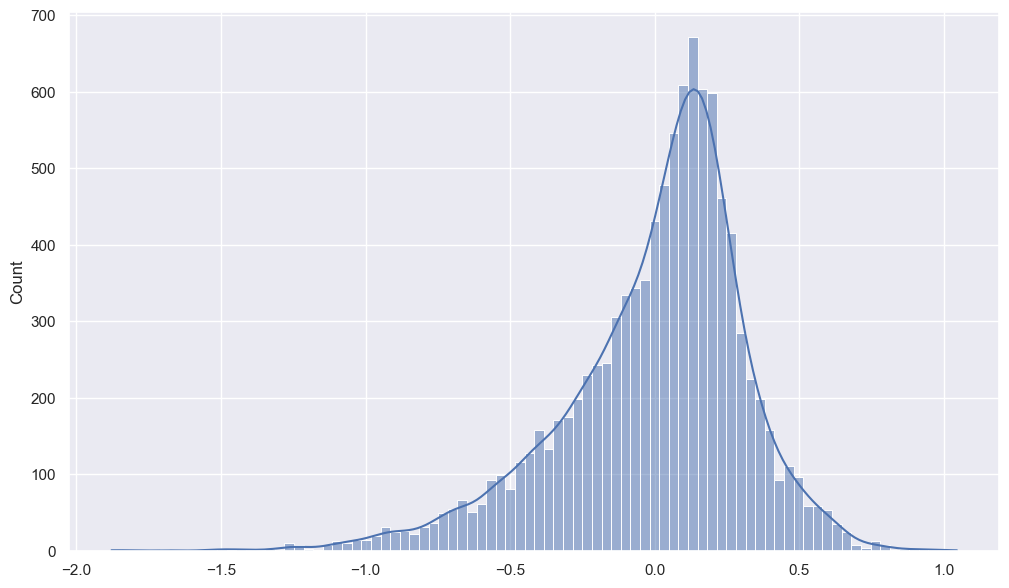

In [74]:
plt.figure(figsize=(12,7))
sns.histplot(Y2_test-Y_lr2, kde=True)
plt.show()

## Random Forest Regression

For data_with_location

In [75]:
rf1 = RandomForestRegressor()
rf1.fit(X1_train, Y1_train)

RandomForestRegressor()

In [76]:
Y_rf1 = rf1.predict(X1_test)
Y_rf1[:100]

array([3.217     , 3.55403571, 3.7       , 3.22380808, 3.219     ,
       4.1       , 3.616     , 3.7       , 4.2       , 3.7       ,
       3.5       , 3.7       , 3.7       , 3.7       , 4.367     ,
       3.27005   , 3.98288333, 4.2       , 3.7       , 3.2       ,
       3.156     , 3.7       , 3.7       , 3.7417    , 3.6166    ,
       3.83055   , 3.7       , 4.3       , 3.5       , 3.379     ,
       3.503     , 3.26842024, 4.2       , 4.389     , 3.994     ,
       3.19525   , 4.409     , 3.492     , 3.7       , 4.099     ,
       3.774     , 3.7       , 3.611     , 4.133     , 3.532     ,
       3.5585    , 3.999     , 3.279     , 4.4       , 4.203     ,
       3.8       , 4.2       , 3.7       , 3.012     , 3.7       ,
       3.867     , 3.3       , 3.806     , 3.7       , 3.7       ,
       3.7       , 3.9       , 2.89      , 3.65817857, 4.        ,
       4.11015714, 3.29      , 3.104     , 3.978     , 3.3       ,
       3.7       , 3.699     , 3.601     , 3.33858258, 3.5362 

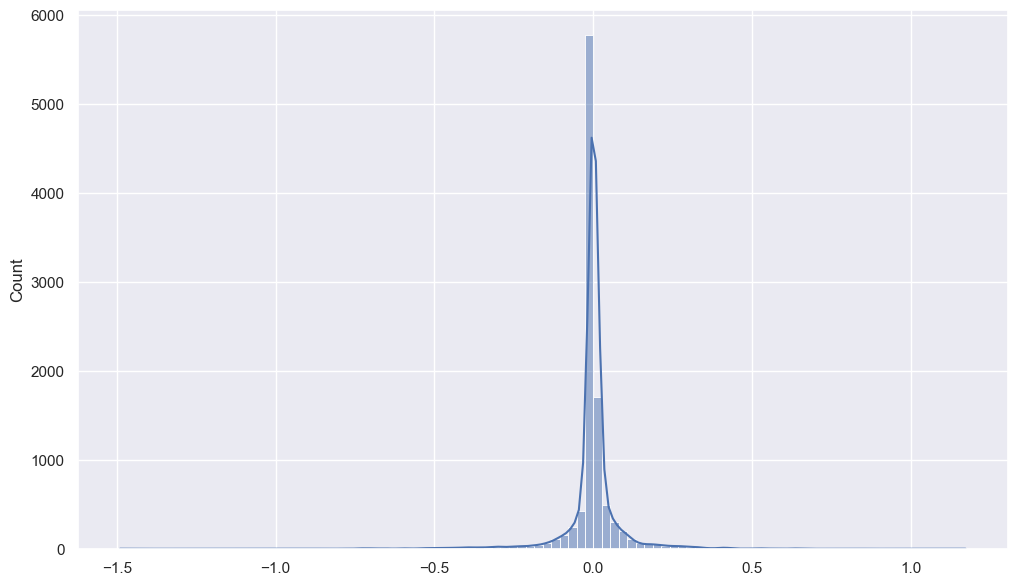

In [77]:
plt.figure(figsize=(12,7))
sns.histplot(Y1_test-Y_rf1, kde=True, bins=100)
plt.show()

For data_with_area

In [78]:
rf2 = RandomForestRegressor()
rf2.fit(X2_train, Y2_train)

RandomForestRegressor()

In [79]:
Y_rf2 = rf2.predict(X2_test)
Y_rf2[:100]

array([3.7       , 4.091     , 4.3       , 3.272     , 3.34      ,
       3.7       , 4.2       , 4.192     , 3.125     , 3.769     ,
       3.46      , 3.7       , 3.7       , 4.185     , 3.69      ,
       3.299     , 4.416     , 3.677     , 4.285     , 3.7       ,
       4.156     , 3.995     , 3.377     , 3.899     , 3.7       ,
       4.3       , 4.101     , 3.4745    , 3.7       , 3.7       ,
       3.604     , 3.895     , 4.084     , 3.9       , 3.7       ,
       3.205     , 4.513     , 3.175     , 3.098     , 3.502     ,
       2.889     , 4.028     , 4.56      , 3.7       , 3.7       ,
       4.089     , 3.922     , 2.901     , 3.606     , 3.529     ,
       3.022     , 4.051     , 3.7       , 3.018     , 3.692     ,
       3.9       , 3.586     , 3.824     , 3.7       , 3.393     ,
       3.41      , 4.203     , 3.881     , 3.7       , 4.398     ,
       3.999     , 4.042     , 3.717     , 3.433     , 3.882     ,
       3.1815    , 4.1       , 3.7       , 3.6992    , 3.724  

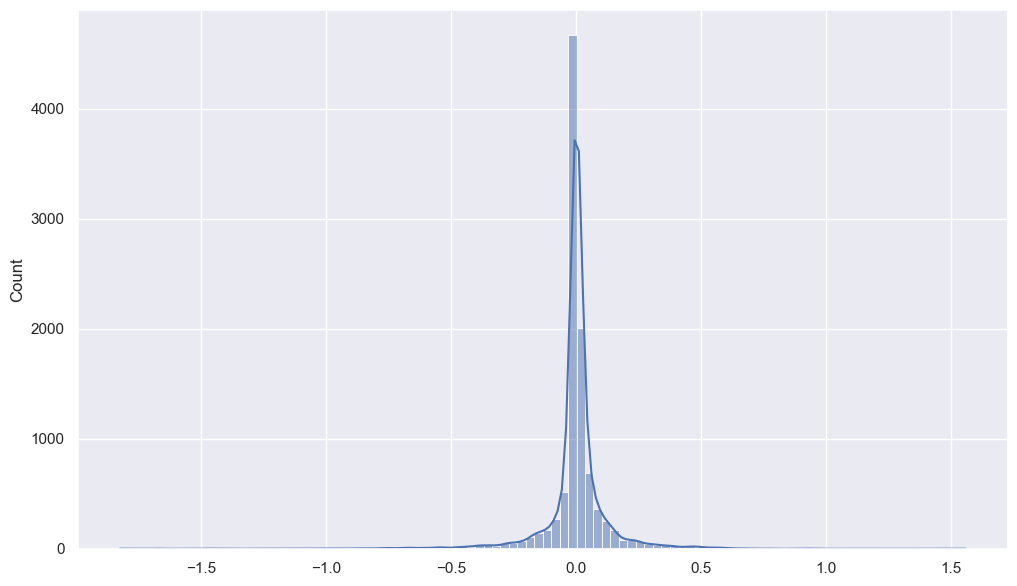

In [80]:
plt.figure(figsize=(12,7))
sns.histplot(Y2_test - Y_rf2, kde=True, bins=100)
plt.show()

## Decision Tree Regressor

For Data_With_Location

In [81]:
dt1 = DecisionTreeRegressor()
dt1.fit(X1_train, Y1_train)

DecisionTreeRegressor()

In [82]:
Y_dt1 = dt1.predict(X1_test)
Y_dt1[:100]

array([3.2       , 2.9       , 3.7       , 3.2       , 3.2       ,
       4.1       , 3.6       , 3.7       , 4.2       , 3.7       ,
       3.5       , 3.7       , 3.7       , 3.7       , 4.4       ,
       3.2       , 4.05      , 4.2       , 3.7       , 3.2       ,
       3.1       , 3.7       , 3.7       , 3.75      , 3.6       ,
       3.85      , 3.7       , 4.3       , 3.5       , 3.4       ,
       3.5       , 3.43333333, 4.2       , 4.4       , 4.        ,
       3.2       , 4.4       , 3.5       , 3.7       , 4.1       ,
       3.8       , 3.7       , 3.5       , 3.9       , 2.9       ,
       3.6       , 4.        , 3.3       , 4.4       , 4.2       ,
       3.8       , 4.2       , 3.7       , 3.        , 3.7       ,
       3.9       , 3.3       , 3.9       , 3.7       , 3.7       ,
       3.7       , 3.9       , 2.9       , 3.7       , 4.        ,
       4.1       , 3.3       , 3.1       , 4.        , 3.3       ,
       3.7       , 3.7       , 3.6       , 3.2       , 3.6    

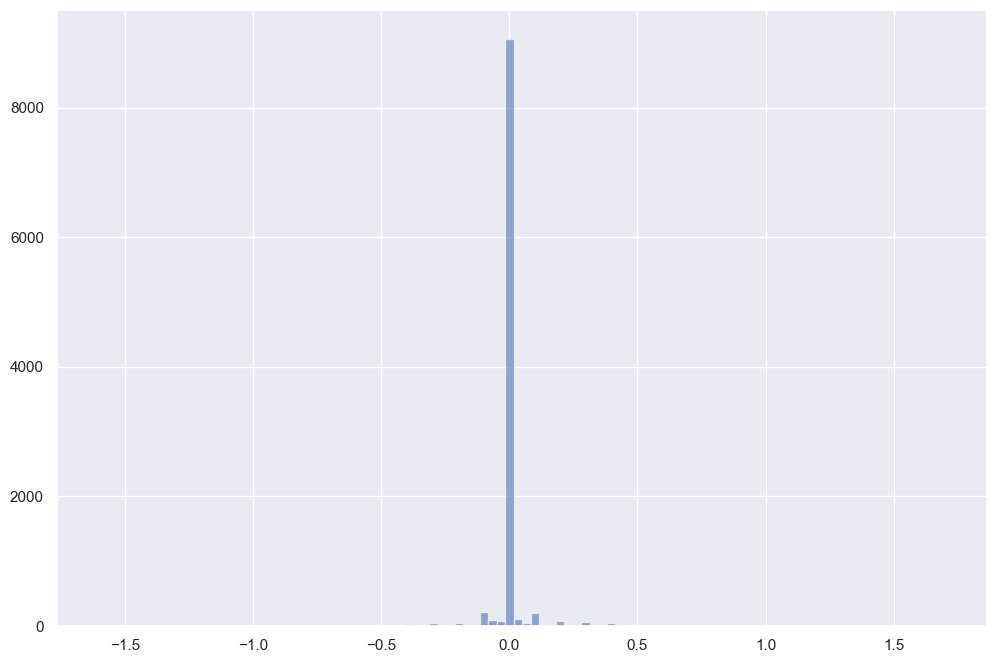

In [83]:
plt.figure(figsize=(12,8))
plt.hist(Y1_test-Y_dt1, bins=100, alpha=0.6)
plt.show()

For Data_with_Area

In [84]:
dt2 = DecisionTreeRegressor()
dt2.fit(X2_train, Y2_train)

DecisionTreeRegressor()

In [85]:
Y_dt2 = dt2.predict(X2_test)
Y_dt2[:100]

array([3.7 , 4.1 , 4.3 , 3.  , 3.1 , 3.7 , 4.2 , 4.2 , 3.1 , 3.9 , 3.3 ,
       3.7 , 3.7 , 4.2 , 3.7 , 3.3 , 4.4 , 4.  , 4.3 , 3.7 , 4.2 , 4.  ,
       3.2 , 3.9 , 3.7 , 4.3 , 4.1 , 3.5 , 3.7 , 3.7 , 3.6 , 3.9 , 4.1 ,
       3.9 , 3.7 , 3.3 , 4.5 , 3.1 , 2.8 , 3.5 , 2.8 , 4.1 , 4.6 , 3.7 ,
       3.7 , 4.5 , 3.9 , 2.7 , 3.7 , 3.5 , 3.1 , 4.1 , 3.7 , 3.  , 3.6 ,
       3.9 , 3.6 , 3.9 , 3.7 , 3.4 , 3.4 , 4.2 , 4.  , 3.7 , 4.4 , 4.  ,
       4.  , 3.7 , 3.4 , 4.1 , 3.1 , 4.1 , 3.7 , 3.7 , 3.9 , 4.8 , 3.8 ,
       3.9 , 4.1 , 4.  , 3.6 , 3.7 , 4.5 , 3.7 , 3.8 , 3.7 , 3.5 , 4.3 ,
       4.5 , 3.1 , 3.7 , 3.3 , 3.85, 3.9 , 3.2 , 4.  , 3.7 , 3.7 , 3.3 ,
       3.9 ])

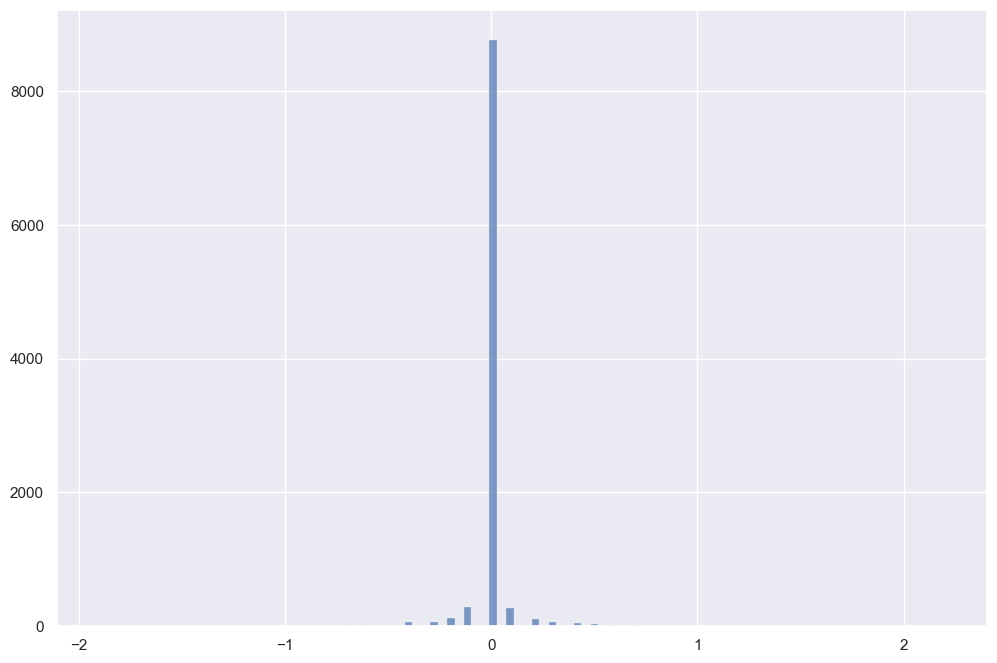

In [86]:
plt.figure(figsize=(12,8))
plt.hist(Y2_test - Y_dt2, bins=100, alpha=0.7)
plt.show()

## Model Evaluation

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Linear Regression Model

for data_with_location

In [88]:
mae =  mean_absolute_error(Y1_test, Y_lr1)
mse = mean_squared_error(Y1_test, Y_lr1)
r2score = r2_score(Y1_test, Y_lr1)

print("Coefficient of Determination for train data : ",lr1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",lr1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.35911633601345305
Coefficient of Determination for test data :  0.3599064459897027
Mean Absolute Error :  0.2400495037705429
Mean Squared Error :  0.10093699131715095
Root Mean Squared Error :  0.3177058251231018
R2 Score :  0.3599064459897027


for data_with_area

mae =  mean_absolute_error(Y2_test, Y_lr2)
mse = mean_squared_error(Y2_test, Y_lr2)
r2score = r2_score(Y2_test, Y_lr2)

print("Coefficient of Determination for train data : ",lr2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",lr2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

## Random Forest Regression Model

for data_with_location

In [89]:
mae =  mean_absolute_error(Y1_test, Y_rf1)
mse = mean_squared_error(Y1_test, Y_rf1)
r2score = r2_score(Y1_test, Y_rf1)

print("Coefficient of Determination for train data : ",rf1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",rf1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.99010871423497
Coefficient of Determination for test data :  0.9427572011770233
Mean Absolute Error :  0.03603812731277861
Mean Squared Error :  0.0090266740721955
Root Mean Squared Error :  0.09500881049774015
R2 Score :  0.9427572011770233


for data_with_area

In [90]:
mae =  mean_absolute_error(Y2_test, Y_rf2)
mse = mean_squared_error(Y2_test, Y_rf2)
r2score = r2_score(Y2_test, Y_rf2)

print("Coefficient of Determination for train data : ",rf2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",rf2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.9845600701026852
Coefficient of Determination for test data :  0.8885101836828206
Mean Absolute Error :  0.05844176379071519
Mean Squared Error :  0.017473755310653146
Root Mean Squared Error :  0.13218833273270808
R2 Score :  0.8885101836828206


## Decision Tree Regression Model

for data_with_location

In [91]:
mae =  mean_absolute_error(Y1_test, Y_dt1)
mse = mean_squared_error(Y1_test, Y_dt1)
r2score = r2_score(Y1_test, Y_dt1)

print("Coefficient of Determination for train data : ",dt1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",dt1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.998763195049567
Coefficient of Determination for test data :  0.9215125908316876
Mean Absolute Error :  0.02499107433792592
Mean Squared Error :  0.012376757878739986
Root Mean Squared Error :  0.1112508781032311
R2 Score :  0.9215125908316876


for data_with_area

In [92]:
mae =  mean_absolute_error(Y2_test, Y_dt2)
mse = mean_squared_error(Y2_test, Y_dt2)
r2score = r2_score(Y2_test, Y_dt2)

print("Coefficient of Determination for train data : ",dt2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",dt2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.9992833408296304
Coefficient of Determination for test data :  0.8367546751490353
Mean Absolute Error :  0.043760415212089517
Mean Squared Error :  0.025585375922933525
Root Mean Squared Error :  0.1599542932307024
R2 Score :  0.8367546751490353


All the ThreeModels has been tranied, Linear regression, Random forest regression and Decision tree regression.
In this model best model for prediction is Random forest regression model.so we will be using Random forest regression model.
Selected model accuracy is 90% up.

## SAVE MODEL

In [93]:
import pickle

In [94]:
with open('rating_prediction.pkl', 'wb') as file:
    pickle.dump(rf1, file)